<a href="https://colab.research.google.com/github/Pragadesh-45/AI-Notebooks/blob/main/Implementation_Of_CNN_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

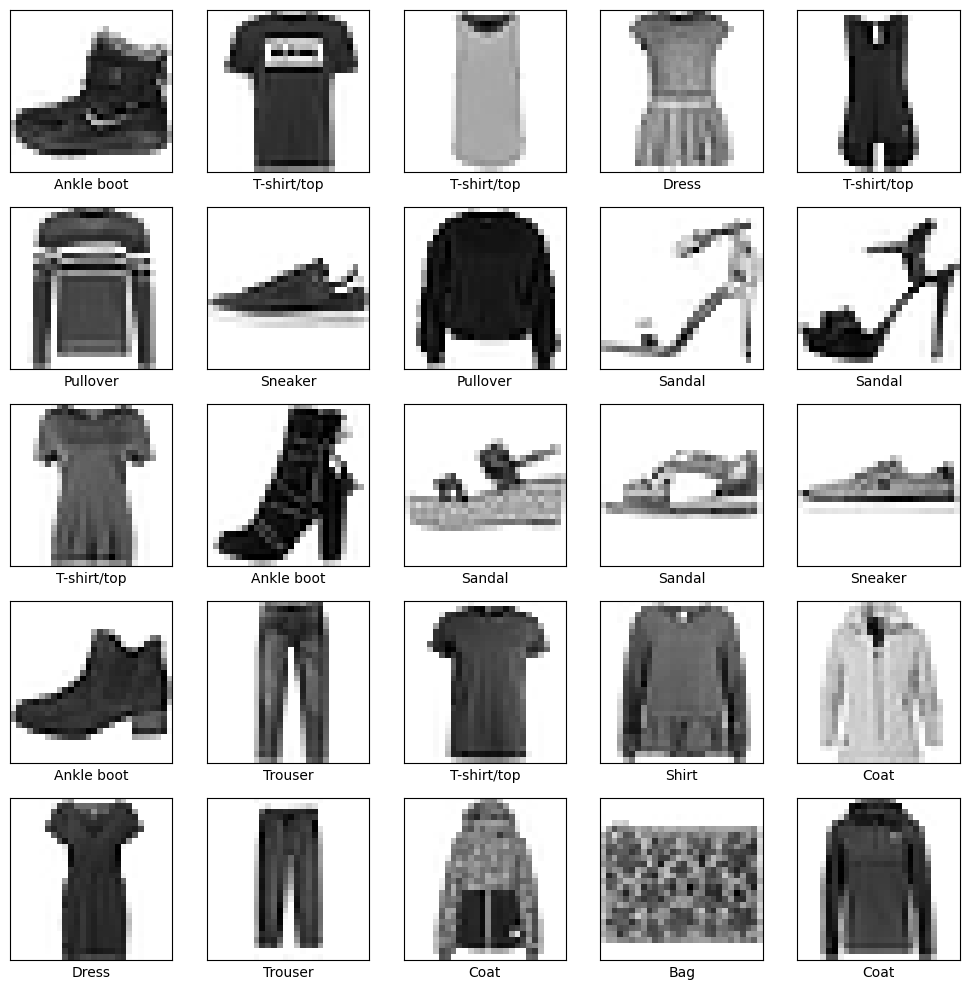

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [17]:
x_train,x_test=x_train/255.0,x_test/255.0

In [18]:
y_train[0]

9

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model Building

In [20]:
model=tf.keras.models.Sequential([

    # 32 - no.of.filters (3,3) - filter size

    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),


    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),


    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),

    # Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

## Model summary to view its architecture

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5095 - accuracy: 0.8125
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3317 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2809 - accuracy: 0.8961
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2513 - accuracy: 0.9066
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2260 - accuracy: 0.9157


In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.8962


[0.28916195034980774, 0.8962000012397766]

In [25]:
model.save('my_cnn_model.keras')

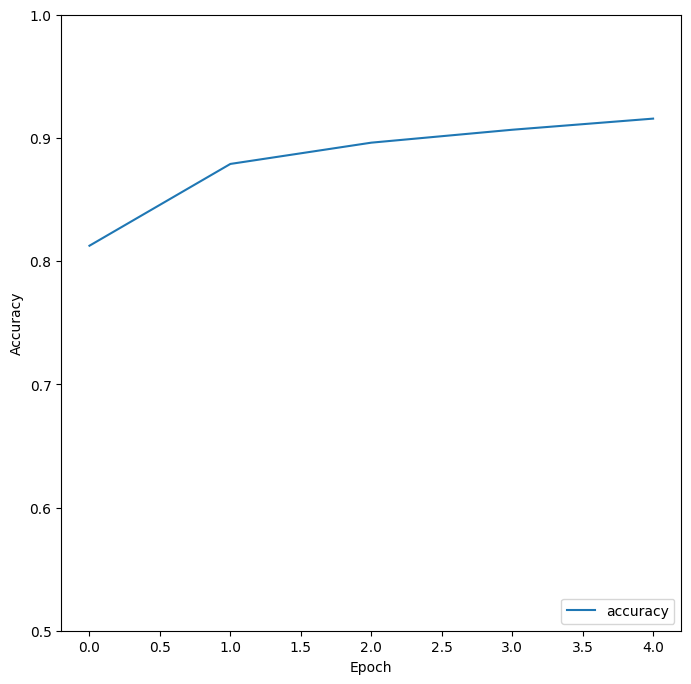

In [26]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [27]:
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[3.41811244e-07, 9.34003364e-09, 7.76893046e-07, ...,
        7.56219320e-04, 1.01383414e-07, 9.98950064e-01],
       [1.60988347e-05, 8.60966551e-08, 9.99561727e-01, ...,
        3.27045449e-08, 1.97917711e-06, 7.46145543e-06],
       [3.13857686e-06, 9.99992728e-01, 2.60731736e-06, ...,
        8.04908973e-10, 3.61546570e-09, 1.62257898e-11],
       ...,
       [2.69256616e-05, 3.83538801e-09, 2.96838198e-06, ...,
        8.65742322e-08, 9.99867082e-01, 7.46109752e-09],
       [1.14309646e-08, 9.99999642e-01, 6.06113133e-08, ...,
        3.47356909e-13, 1.65217049e-08, 3.96371900e-13],
       [5.38315071e-05, 5.89501724e-05, 1.52076915e-04, ...,
        5.63586364e-03, 4.49598127e-04, 6.80497906e-04]], dtype=float32)